In [2]:
# import the necessery libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Task 1: Read the dataset and do data pre-processing

df = pd.read_csv('/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [7]:
df.shape

(200, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
# descriptive statistics

df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [12]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [13]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [14]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [15]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [16]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [17]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [18]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


**Visualization**

Univariate analysis

In [20]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<Axes: >

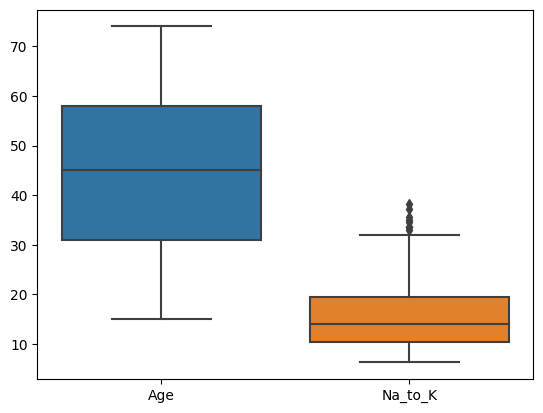

In [21]:
sns.boxplot(df) 

<ipython-input-22-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

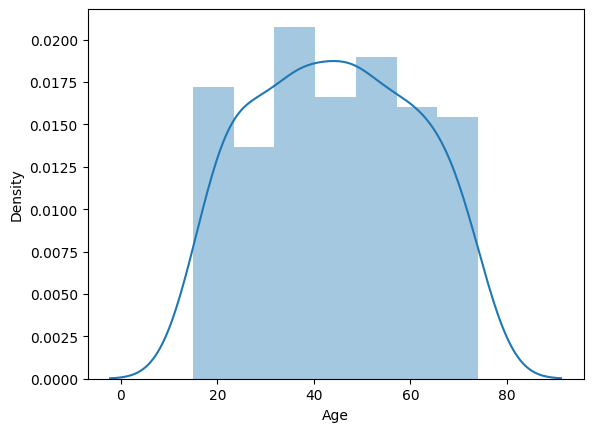

In [22]:
sns.distplot(df.Age)

<ipython-input-23-fda53b94c691>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_to_K)


<Axes: xlabel='Na_to_K', ylabel='Density'>

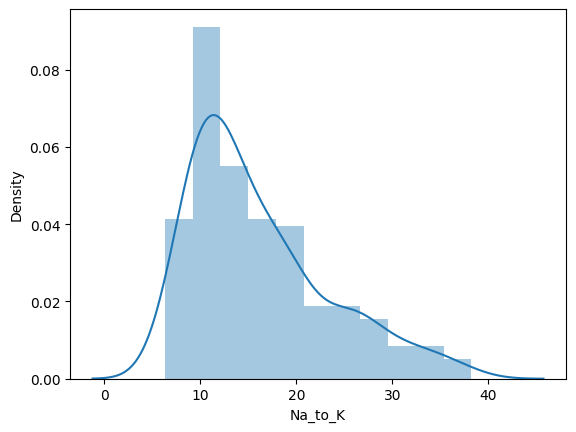

In [23]:
sns.distplot(df.Na_to_K)

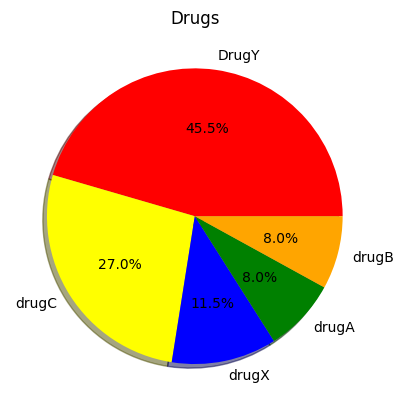

In [24]:
plt.pie(df.Drug.value_counts(),labels=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'],autopct = "%1.1f%%",colors = ['red','yellow','blue','green','orange'],shadow=True)
plt.title('Drugs')
plt.show()

<Axes: ylabel='Drug'>

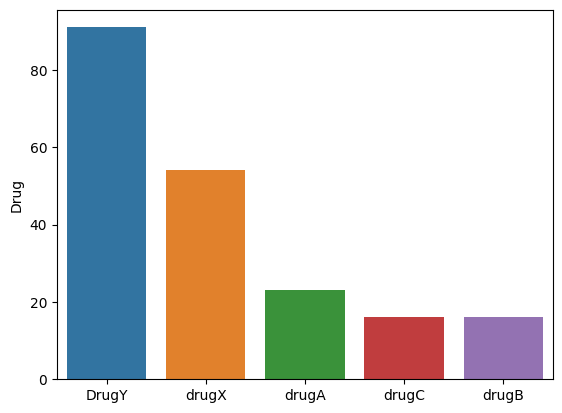

In [25]:
sns.barplot(x=df.Drug.value_counts().index,y=df.Drug.value_counts())

Bivariate Analysis

<Axes: xlabel='Age', ylabel='Na_to_K'>

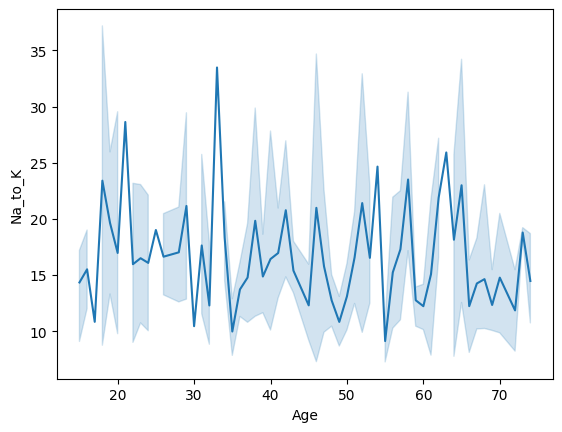

In [26]:
sns.lineplot(x= df.Age,y =df.Na_to_K)

Outlier Detection

<Axes: >

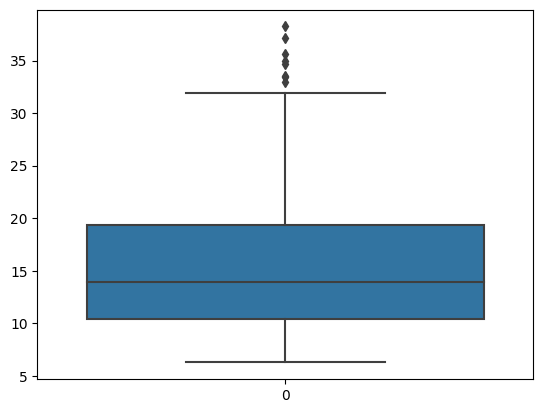

In [27]:
# z score, percentile, iqr - removal methods
# replacement method- median

sns.boxplot(df.Na_to_K)

In [28]:
## Outlier removal using IQR

q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [29]:
q1

10.4455

In [30]:
q3

19.38

In [31]:
IQR = q3 - q1
IQR

8.9345

In [32]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [33]:
upper_limit

32.78175

In [34]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

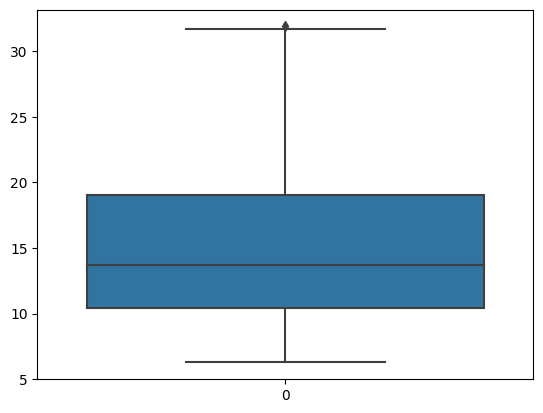

In [35]:
sns.boxplot(df.Na_to_K)

In [36]:
df.shape

(192, 6)

<Axes: >

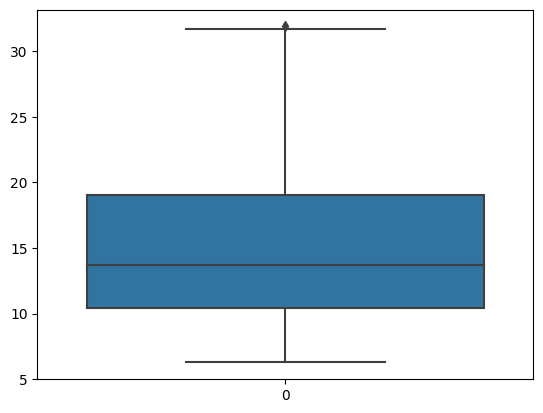

In [37]:
## Percentile

sns.boxplot(df.Na_to_K)

In [38]:
p99 = df.Na_to_K.quantile(0.99)
p99

30.668620000000004

In [39]:
df = df[df.Na_to_K<=p99]

<Axes: >

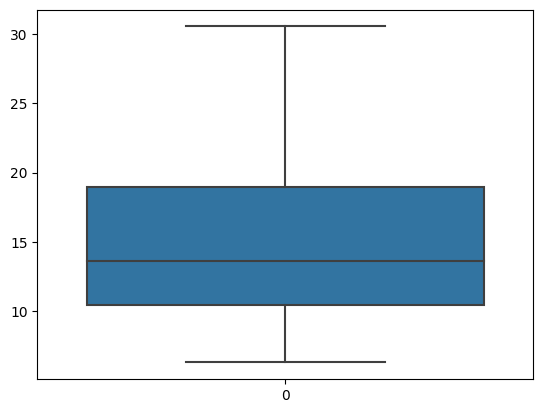

In [40]:
sns.boxplot(df.Na_to_K)

In [41]:
# z score

from scipy import stats
Na_to_K_zscore = stats.zscore(df.Na_to_K)
Na_to_K_zscore

0      1.710822
1     -0.338640
2     -0.836548
3     -1.223642
4      0.488699
         ...   
195   -0.593695
196   -0.520320
197   -0.873319
198   -0.183702
199   -0.630131
Name: Na_to_K, Length: 190, dtype: float64

<Axes: >

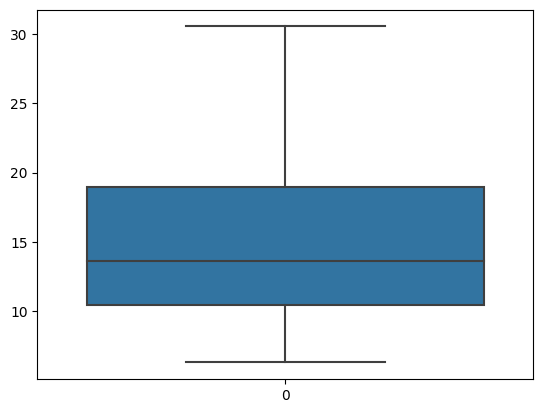

In [42]:
df_z = df[np.abs(Na_to_K_zscore)<=3]
sns.boxplot(df_z.Na_to_K)

In [43]:
df.shape

(190, 6)

<Axes: >

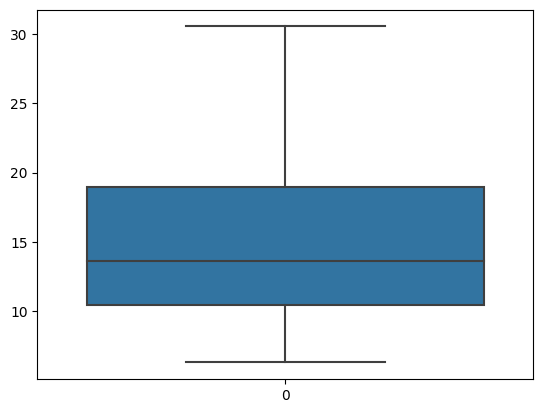

In [44]:
## Replacement of outliers using median

sns.boxplot(df.Na_to_K)

In [45]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [46]:
IQR = q3 - q1
IQR

8.532499999999999

In [47]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [48]:
df.median()

<ipython-input-48-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        44.0000
Na_to_K    13.5975
dtype: float64

In [54]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,30,df['Na_to_K'])

<Axes: >

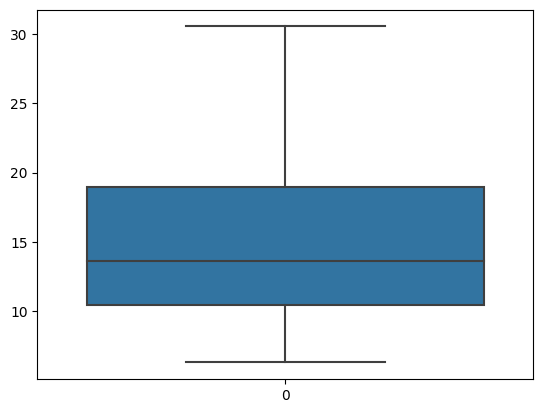

In [55]:
sns.boxplot(df.Na_to_K)

In [56]:
df.shape

(190, 6)

In [57]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [59]:
# Splitting the dependent and independent columns

x=df.drop(columns = ['Drug'],axis=1)
y=df['Drug']


In [60]:
#convert categorical to numerical data

from sklearn.preprocessing import LabelEncoder

x=pd.get_dummies(x,columns=['Sex','BP','Cholesterol'],drop_first = True)

le=LabelEncoder()
y=le.fit_transform(y)

In [61]:
#splitting the training and testing datasets

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3, random_state=21)

In [62]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((133, 6), (57, 6), (133,), (57,))

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [64]:
from tensorflow import keras

ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

In [65]:
# Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)
# Training and testing

yclass=len(np.unique(y))
print(yclass)

5


In [66]:
#library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Model

model = Sequential()
model.add(Dense(48, input_dim=6, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(yclass,activation='softmax')
model.add(output_layer)

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.fit(xtrain,ytrain,epochs=20,batch_size=6)

Epoch 1/20
23/23 [==============================] - 2s 7ms/step - loss: 1.5425 - accuracy: 0.4060
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 1.3332 - accuracy: 0.6391
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 1.0349 - accuracy: 0.6917
Epoch 4/20
23/23 [==============================] - 0s 5ms/step - loss: 0.7612 - accuracy: 0.6842
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 0.5979 - accuracy: 0.7068
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4858 - accuracy: 0.8195
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8872
Epoch 8/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3377 - accuracy: 0.9023
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2773 - accuracy: 0.9023
Epoch 10/20
23/23 [==============================] - 0s 4ms/step - loss: 0.2372 - accuracy: 0.9098
Epoch 11/20
23/23 [

In [70]:
# Task 3: Test the model with random data

test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 9ms/step - loss: 0.1597 - accuracy: 0.9123
Test accuracy: 91.22806787490845
